# Unemployment Analysis In India

__Importing Libraries__

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

__Loading Dataset__

In [130]:
df = pd.read_csv("Unemployment in India.csv")

In [115]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural,South
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural,South
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural,South
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural,South
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural,South


In [116]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1
266,Rajasthan,29-02-2020,Monthly,14.48,15040572,41.83,Rural,North
267,Rajasthan,31-03-2020,Monthly,9.47,15059769,39.47,Rural,North
268,Rajasthan,30-04-2020,Monthly,12.25,13051219,35.21,Rural,North
269,Rajasthan,31-05-2020,Monthly,10.45,15586833,41.11,Rural,North
270,Rajasthan,30-06-2020,Monthly,13.86,16076978,43.98,Rural,North


In [117]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,271.000000,2.710000e+02,271.000000
mean,10.167970,8.632895e+06,43.029077
std,9.769155,7.048412e+06,7.248631
min,0.000000,4.942000e+04,13.330000
25%,3.765000,2.196736e+06,39.075000
50%,7.130000,6.894808e+06,42.130000
75%,13.755000,1.338220e+07,45.365000
max,74.510000,2.683539e+07,69.660000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    271 non-null    object 
 1    Date                                     271 non-null    object 
 2    Frequency                                271 non-null    object 
 3    Estimated Unemployment Rate (%)          271 non-null    float64
 4    Estimated Employed                       271 non-null    int64  
 5    Estimated Labour Participation Rate (%)  271 non-null    float64
 6   Area                                      271 non-null    object 
 7   Region.1                                  271 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.1+ KB


__Preprocessing the Dataset__

In [119]:
df.duplicated().sum()

0

In [120]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
Region.1                                    0
dtype: int64

__Correlation Matrix__

In [121]:
# Exclude the non-numeric columns
df = df.select_dtypes(include=[float, int])



In [122]:
df.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.184376,-0.188043
Estimated Employed,-0.184376,1.000000,0.029506
Estimated Labour Participation Rate (%),-0.188043,0.029506,1.000000


<Axes: >

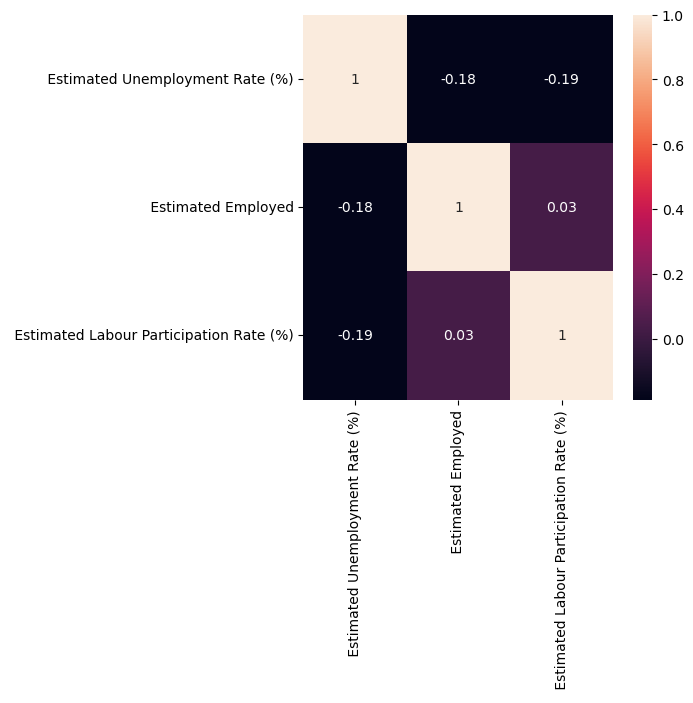

In [123]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)


__Analysis__

In [132]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Region.1'],
      dtype='object')


In [133]:
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  \
0             11999139                                     43.24  Rural   
1             11755881                                     42.05  Rural   
2             12086707                                     43.50  Rural   
3             12285693                                     43.97  Rural   
4             12256762                                     44.68  Rural   

  Region.1  
0    South  
1    South  
2    South  
3    South  
4    Sout

In [134]:
df.columns = df.columns.str.strip()


In [135]:
df.rename(columns={"Region": "Region"}, inplace=True)


In [136]:

df.reset_index(inplace=True)


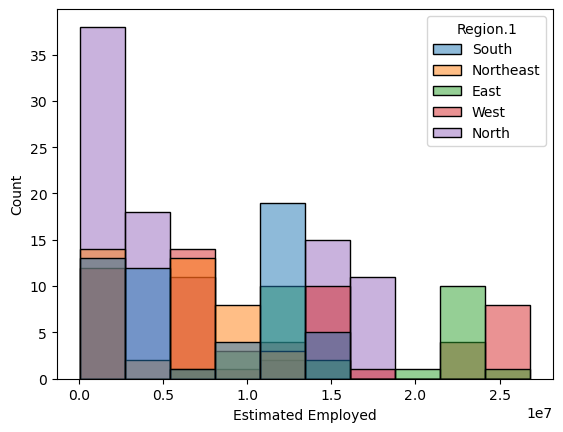

In [137]:
plt.title = ("India Unemployment")
sns.histplot(x="Estimated Employed",hue = "Region.1", data=df)
plt.show()


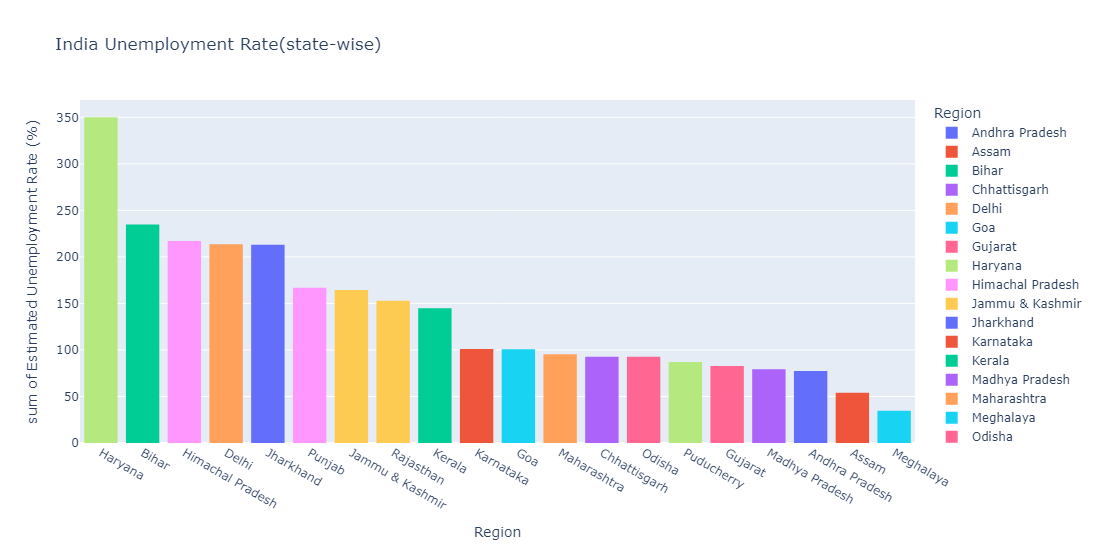

In [149]:
fig = px.histogram(df, x="Region", y="Estimated Unemployment Rate (%)",title="India Unemployment Rate(state-wise)", template="plotly", color='Region')
fig.update_layout(xaxis={'categoryorder': 'total descending'},width=1000,height=550)
fig.show()

In [150]:
df.columns

Index(['index', 'Region', 'Date', 'Frequency',
       'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Area', 'Region.1'],
      dtype='object')

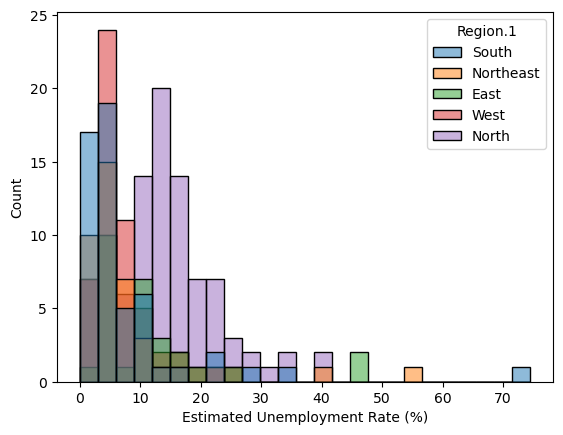

In [153]:
plt.Figure(figsize=(10,10))
plt.title="India Unemployment Rate"
sns.histplot(x = "Estimated Unemployment Rate (%)", hue="Region.1", data=df)
plt.show()

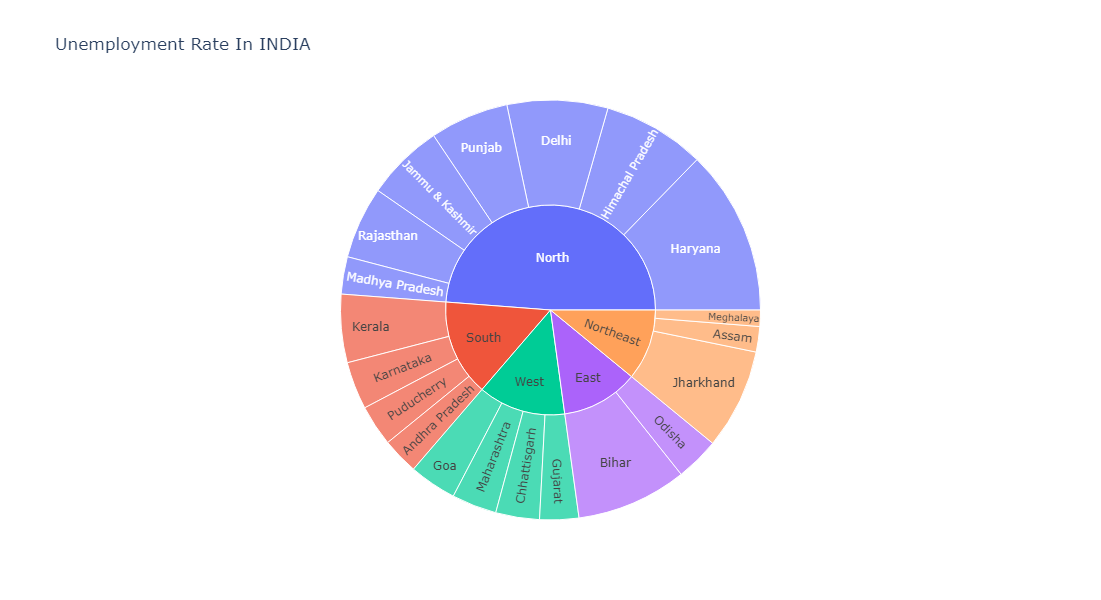

In [181]:
Unemployment = df[["Region","Region.1", "Estimated Unemployment Rate (%)"]]
figure = px.sunburst(Unemployment, path=["Region.1","Region"],
                     values = "Estimated Unemployment Rate (%)",
                     width=600,height=600, 
                     title="Unemployment Rate In INDIA")

                     
figure.show()